## Problem Statement

**In this problem we have been simulated as an independent consultant**

   Our client is a large MNC and they have 9 broad verticals across the organisation. One of the problem our client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

   * They first identify a set of employees based on recommendations/ past performance
   * Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
   * At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

   For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs our help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 
    
![](hr.png)

   They have provided multiple attributes around Employee's past and current performance along with demographics. Now, the task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

## Data Description

![](hr_data_description.png)

## Project Steps:
  
   1. Setting up the main libraries and importing the dataset 
   2. Choosing the Sample Dataset
   3. Data Wrangling / Data Preprocessing
        - 3.1. Data Formatting
        - 3.2. Cardinality
        - 3.3. Missing Data Imputation  
   4. Visual Exploratory Data Analysis
       - 4.1. Correlation Matrix
   5. Model Development
       - 5.1. Spliting data into X and y
       - 5.2. Encoding Categorical data (Dummy variable creation)
       - 5.3. Spliting data into training and testing sets
       - 5.4. Feature Scaling (Data Standardization)
       - 5.5. Building Models
       - 5.6. Hyperparamter Tuning
             -5.6.1. Tuning K-nearest and Random Forest model using Elbow Method
             -5.6.2. Tuning Logistic Regression model and Random Forest Classifier model using Random Search CV
             -5.6.3. Tuning Logistic Regression model and Random Forest Classifier model using Grid Search CV
   6. Model Evaluation
   

## 1. Setting up the main libraries and importing the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
hr_data = pd.read_csv('C:\\Users\\R558\\Downloads\\Hackathons\\Analytics Vidya Hackathon\\HR Analytics\\train_data.csv')
hr_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 4.8+ MB


## 2. Choosing Sample Dataset

*We can see that we have a huge dataset with 54808 entries!*

In [6]:
len(hr_data)

54808

    Since we have a huge dataset and limited processing capacity we will choose a smaller random fraction (sample) for our analysis purpose.
    
    Note:
    Large data set will further slow our processing time.

In [7]:
df = hr_data.sample(frac=0.10)
len(df)

5481

    We selected 10% of the total dataset. Now we comparatively have a smaller dataset for our analysis i.e. we have randomly selected 5481 rows for our analysis.
    
    We can clearly see below that we randomly selected 10% chunk of our data from rows 49045 to 50134 and memory usage is reduced to 535.3+ KB
    

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5481 entries, 27855 to 3182
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           5481 non-null   int64  
 1   department            5481 non-null   object 
 2   region                5481 non-null   object 
 3   education             5247 non-null   object 
 4   gender                5481 non-null   object 
 5   recruitment_channel   5481 non-null   object 
 6   no_of_trainings       5481 non-null   int64  
 7   age                   5481 non-null   int64  
 8   previous_year_rating  5063 non-null   float64
 9   length_of_service     5481 non-null   int64  
 10  KPIs_met >80%         5481 non-null   int64  
 11  awards_won?           5481 non-null   int64  
 12  avg_training_score    5481 non-null   int64  
 13  is_promoted           5481 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 535.3+ KB


## 3. Data Wrangling / Data Preprocessing

### 3.1. Data Formatting

   In the `gender` column the categories are labelled `m` for male and `f` for female
   
   We will replace them with full `Male` and `Female` labels for better visualization purposes in next section

In [9]:
df.gender = df.gender.replace(['f', 'm'], ['Female', 'Male'])

In [10]:
df.gender.head()

27855    Female
9861       Male
46741      Male
33212    Female
40931    Female
Name: gender, dtype: object

   We can see that the original labels have been successfully replaced with appropriate Male and Female labels

### 3.2. Cardinality

The number of different `labels` (categories) within a categorical variable is known as `cardinality`

A `high` number of labels within a variable is known as `high cardinality`.

High cardinality may pose the following problems:

   - Variables with too many labels tend to dominate over those with only a few labels, particularly in `Tree based algorithms`
   - A big number of labels within a variable may introduce noise with little, if any, information, therefore making machine learning models prone to `over-fit`
   - Some of the labels may only be present in the training data set, but not in the test set, therefore machine learning algorithms may over-fit to the training set.
   - Contrarily, some labels may appear only in the test set, therefore leaving the machine learning algorithms unable to perform a calculation over the new (unseen) observation.

In particular, `tree based methods` can be biased towards variables with lots of labels (variables with high cardinality). Thus, their performance may be affected by high cardinality.

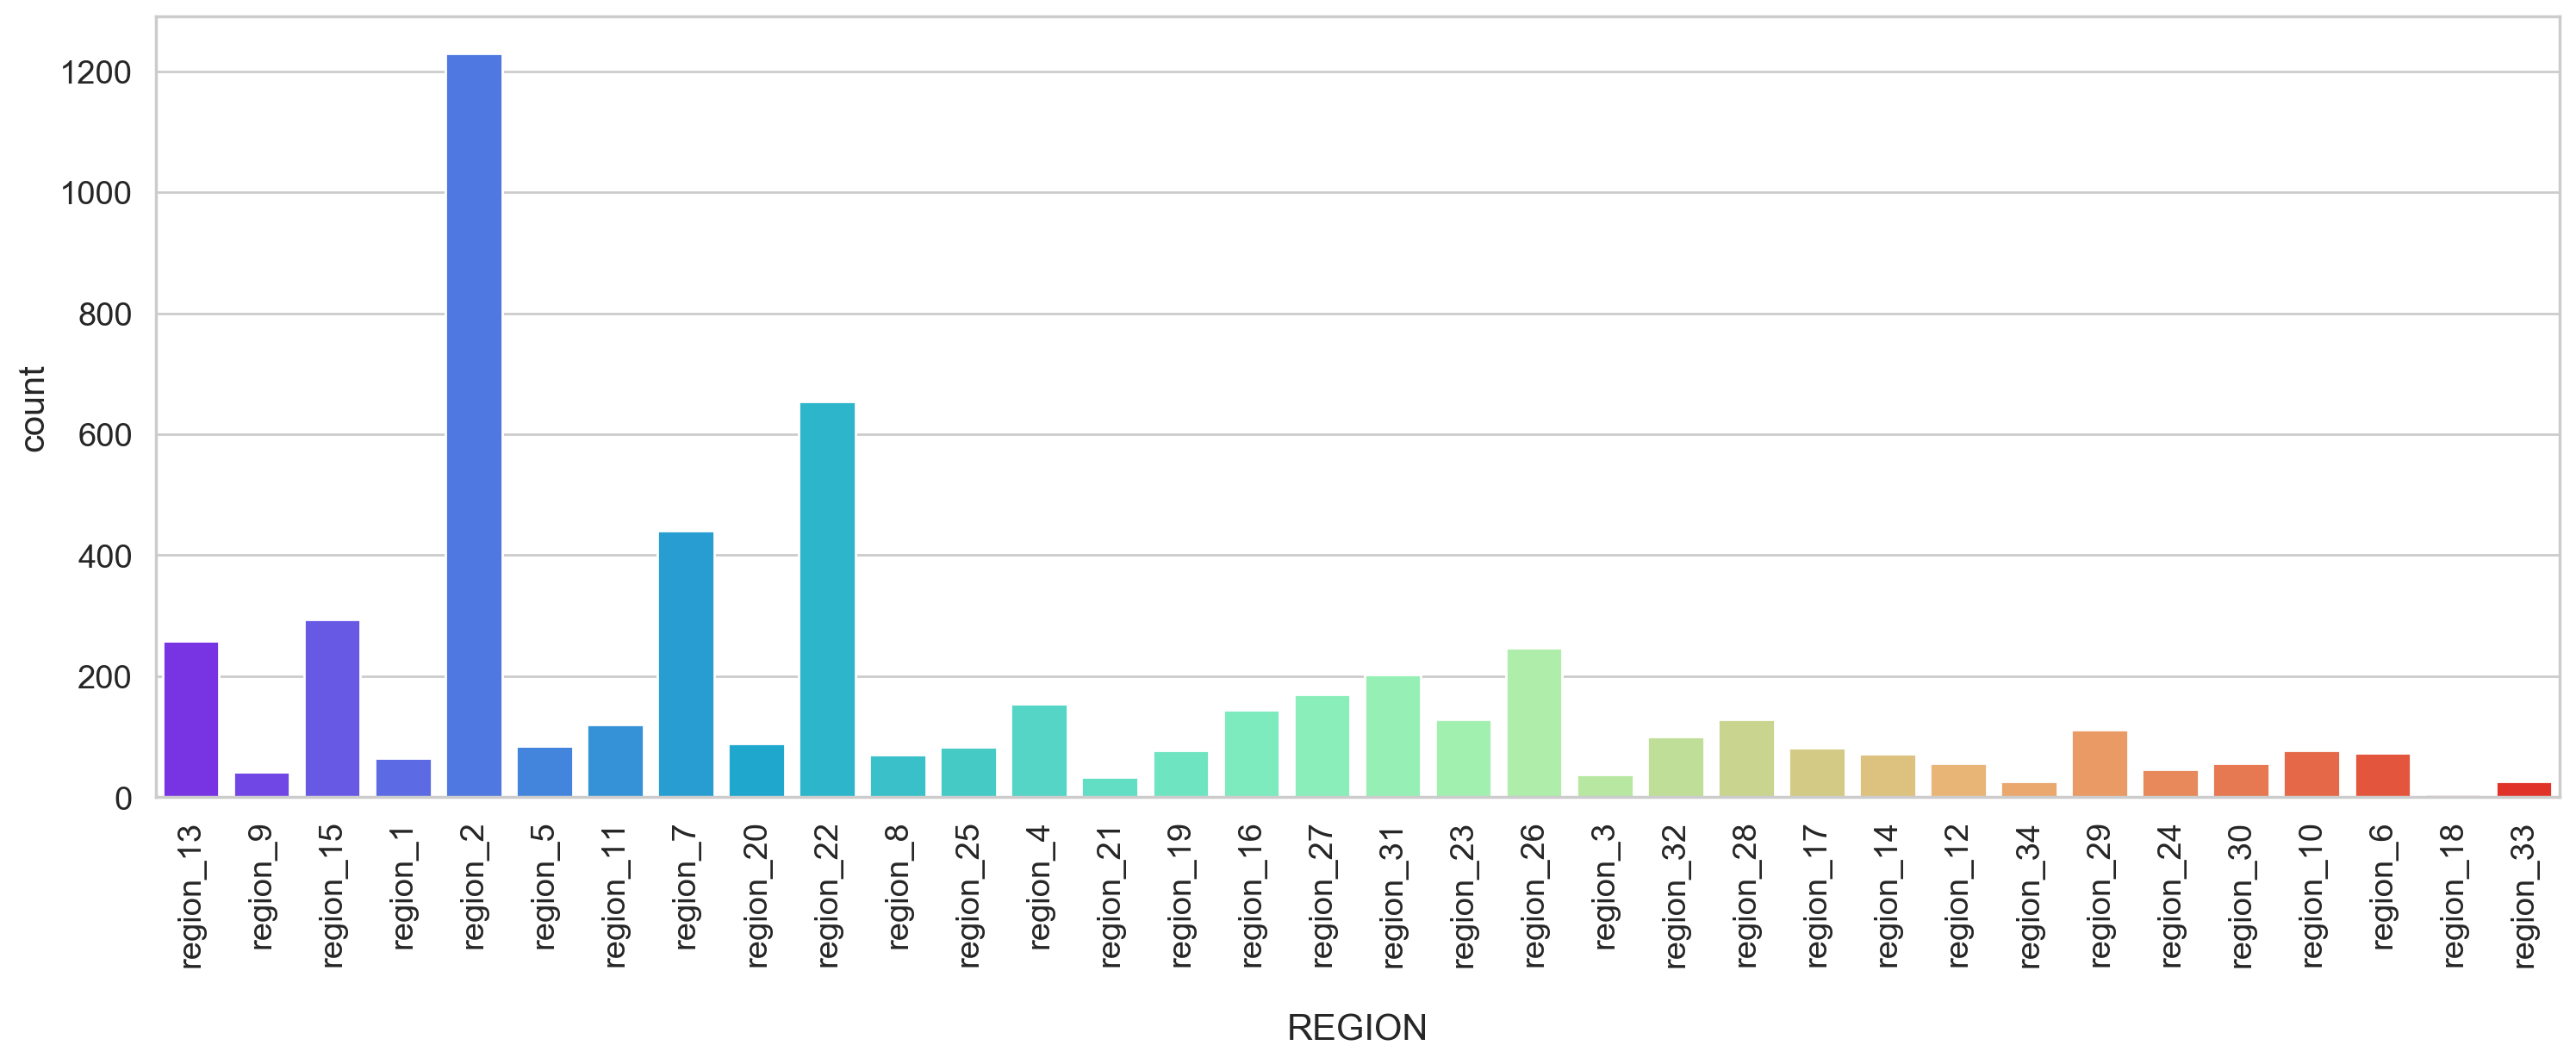

In [11]:
plt.figure(figsize=(18,6), dpi=200)
sns.set(style='whitegrid', font_scale=1.25)
sns.countplot('region', data=df, palette='rainbow')
plt.xlabel('\nREGION')
plt.xticks(rotation=90);

* Here we clearly see that variable `region` has high number of categories i.e. it has a very high cardinality.
   
* One more observation is that the `region` variable measurement is ordinal i.e. the labels in the varibale has an order.. (region_1, region_2, region_3, etc.)

* Since we are going to use tree based algorithm as one of our models we would want to quantify the high cardinality issue for better model accuracy

Now we see that we have 34 unique entries in `region` column. 
We will attempt to reduce these categories to avoid further problems with our model accuracy

In [12]:
df.region.nunique()

34

In [13]:
df.region.values

array(['region_13', 'region_9', 'region_15', ..., 'region_31', 'region_7',
       'region_29'], dtype=object)

In [14]:
region_sorted = df.region.unique().tolist()
region_sorted.sort()

We can see the unique values below

In [15]:
region_sorted

['region_1',
 'region_10',
 'region_11',
 'region_12',
 'region_13',
 'region_14',
 'region_15',
 'region_16',
 'region_17',
 'region_18',
 'region_19',
 'region_2',
 'region_20',
 'region_21',
 'region_22',
 'region_23',
 'region_24',
 'region_25',
 'region_26',
 'region_27',
 'region_28',
 'region_29',
 'region_3',
 'region_30',
 'region_31',
 'region_32',
 'region_33',
 'region_34',
 'region_4',
 'region_5',
 'region_6',
 'region_7',
 'region_8',
 'region_9']

* In the above list we see a pattern. `region_1` is follwed by `region_10 to region_19` and it displays a pattern of `head-region` and `sub-regions`.
* Similar pattern is observed after `region_2` and `region_3`.

* Hence, we will try to `group` the sub-regions in one and attempt to reduced the cardinality

In [16]:
df.region = df.region.replace(['region_1', 'region_10', 'region_11', 
                   'region_12', 'region_13', 'region_14', 
                   'region_15', 'region_16', 'region_17', 
                   'region_18', 'region_19'], 
                  ['region_1', 'region_1', 'region_1', 
                   'region_1', 'region_1', 'region_1', 
                   'region_1', 'region_1', 'region_1', 
                   'region_1', 'region_1'])

In [17]:
df.region = df.region.replace(['region_2', 'region_20', 'region_21', 
                   'region_22', 'region_23', 'region_24', 
                   'region_25', 'region_26', 'region_27', 
                   'region_28', 'region_29'], 
                  ['region_2','region_2','region_2',
                   'region_2','region_2','region_2',
                   'region_2','region_2','region_2', 
                   'region_2','region_2'])

In [18]:
df.region = df.region.replace(['region_3', 'region_30', 
                               'region_31', 'region_32', 
                               'region_33', 'region_34'], 
                              ['region_3','region_3',
                               'region_3','region_3',
                               'region_3','region_3'])

Here we have successfully grouped the sub-regions into their respective head-regions and `reduced` the cardinality to `9` from the original `34`

*Note: This may alter the memory usage of the dataset*

In [19]:
df.region.nunique()

9

We can also see the difference visually

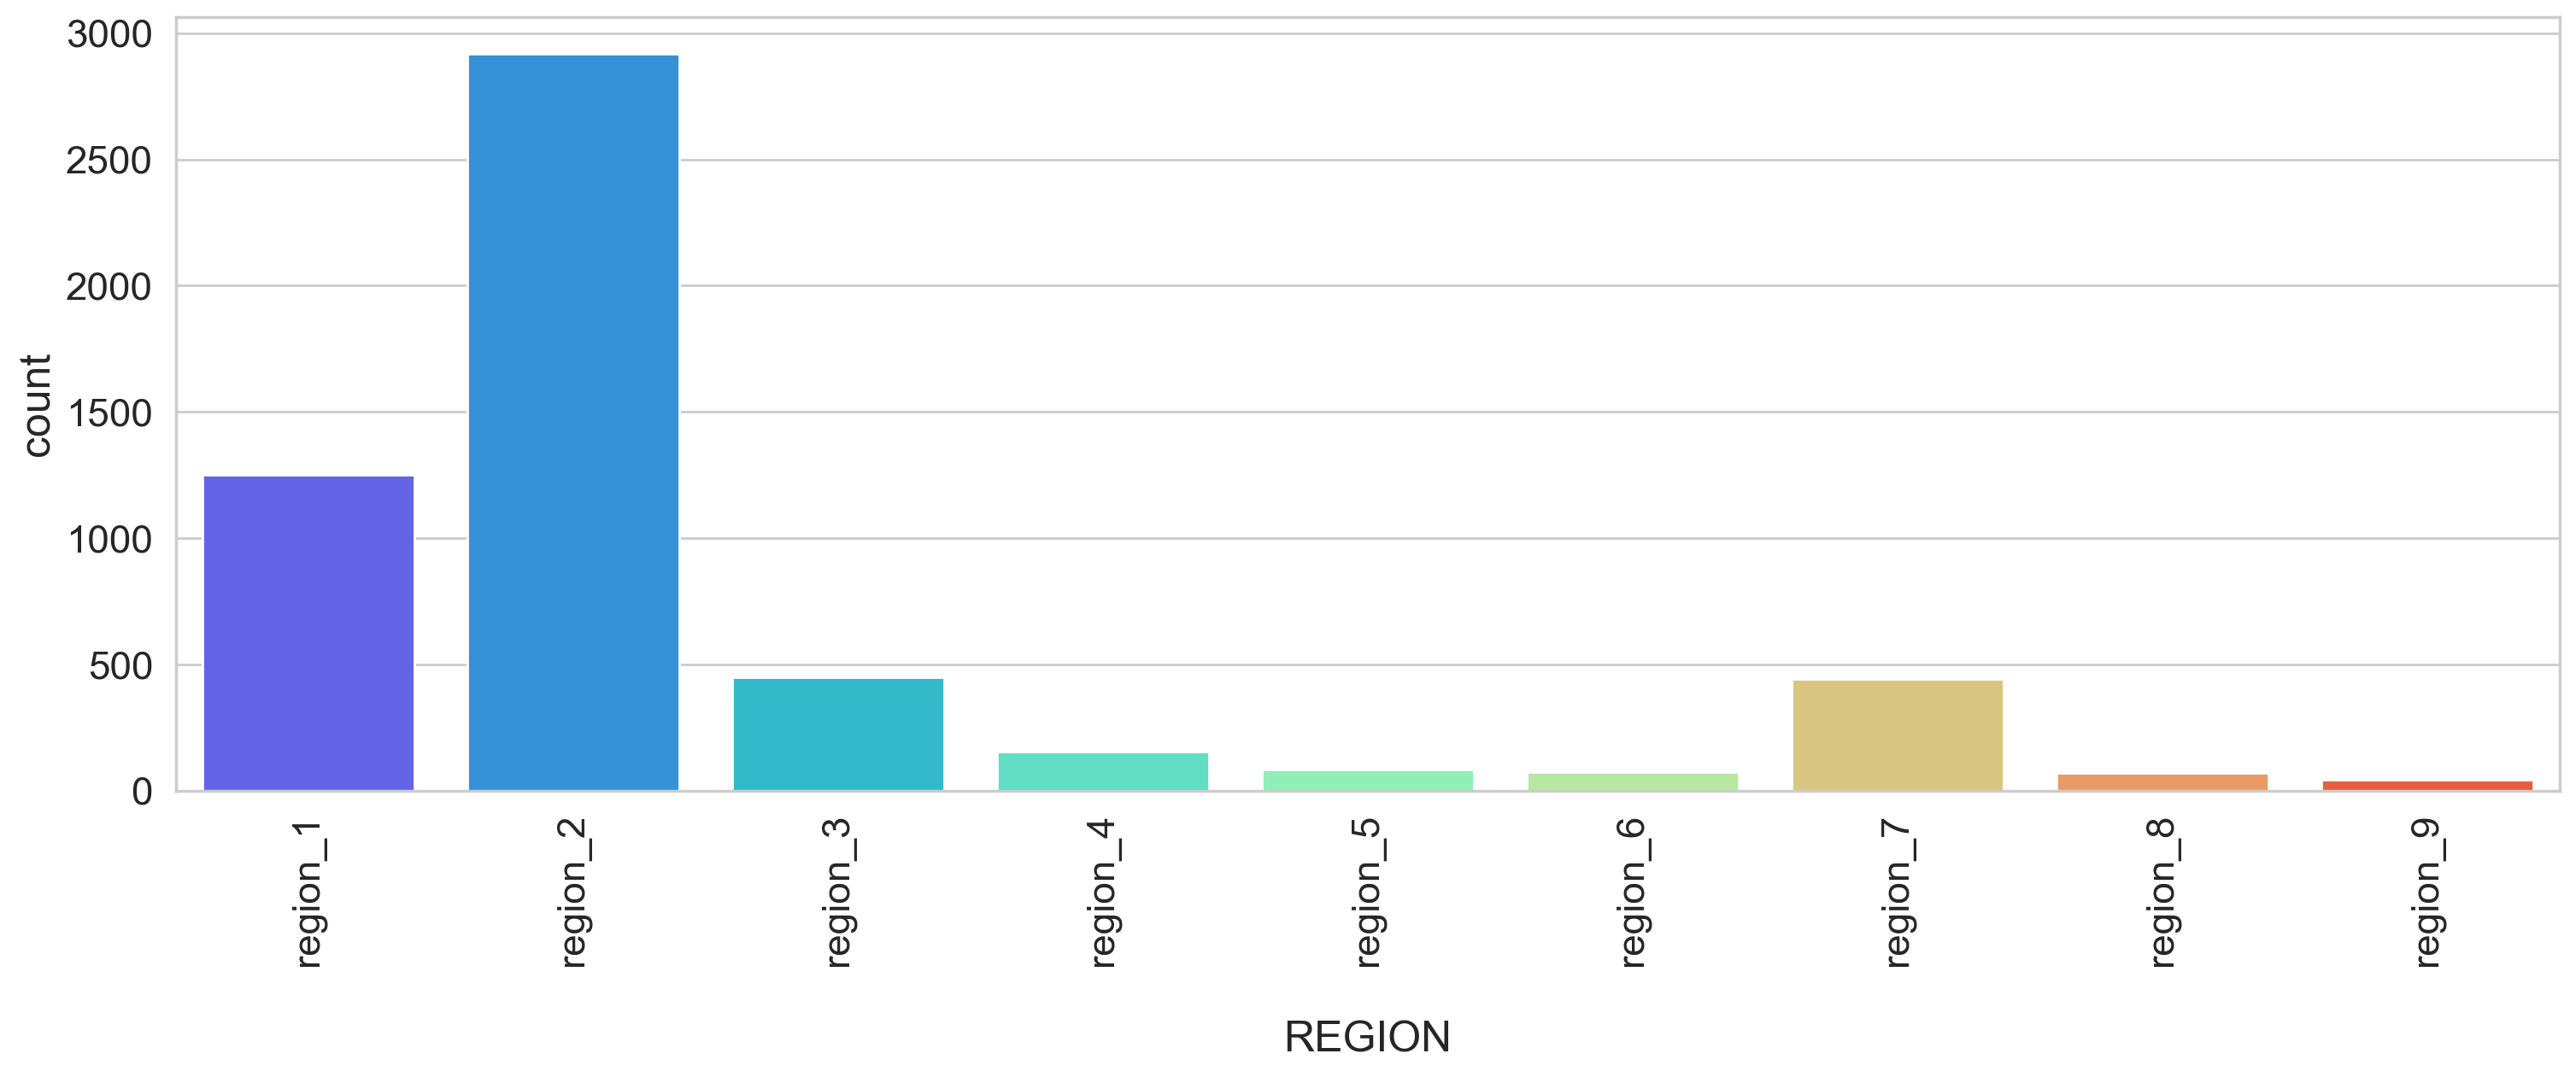

In [20]:
plt.figure(figsize=(18,6), dpi=200)
sns.set(style='whitegrid', font_scale=1.5)
sns.countplot('region', data=df, palette='rainbow', 
              order=['region_1', 'region_2', 'region_3', 
                     'region_4', 'region_5', 'region_6', 
                     'region_7', 'region_8', 'region_9'])
plt.xlabel('\nREGION')
plt.xticks(rotation=90);

### 3.3. Missing Data Imputation

In this section we will impute missing data i.e. will replace the missing data (`Nan`) with some value

For this purpose we will use two general techniques:

* We will replace the `numerical` data with the `mean` and
* We will replace the `categorical` data with the `mode`

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5481 entries, 27855 to 3182
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           5481 non-null   int64  
 1   department            5481 non-null   object 
 2   region                5481 non-null   object 
 3   education             5247 non-null   object 
 4   gender                5481 non-null   object 
 5   recruitment_channel   5481 non-null   object 
 6   no_of_trainings       5481 non-null   int64  
 7   age                   5481 non-null   int64  
 8   previous_year_rating  5063 non-null   float64
 9   length_of_service     5481 non-null   int64  
 10  KPIs_met >80%         5481 non-null   int64  
 11  awards_won?           5481 non-null   int64  
 12  avg_training_score    5481 non-null   int64  
 13  is_promoted           5481 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 663.3+ KB


   We can clearly see that variables/columns `education` and `previous_year_rating` have some missing data
    
    Lets see the percentage of the missing data

In [22]:
df.isnull().mean()*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.269294
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.626346
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

Approximately only 4% of `education` and 7% of `previous_year_rating` data is missing

We can also visualize the missing data with heatmap

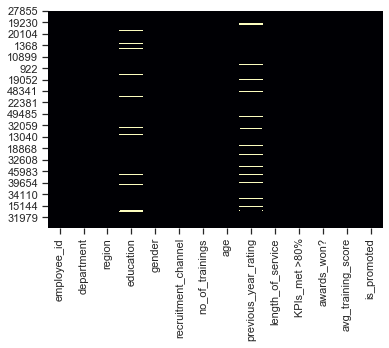

In [23]:
sns.set(style='ticks', font_scale=1)
sns.heatmap(df.isnull(), cbar=False, cmap='magma')

   Since only a very small percentage of data is missing, it is safe to replace the numeric data with mean and categorical data with mode as it will not affect the model in great detail
   
   In this dataset `education` variable is categorical and `previous_year_rating` is numeric

We will visualize these variables using bar graphs and histograms to understand the count and spread of both data types

Visual Representation: Education (*Categorical*)

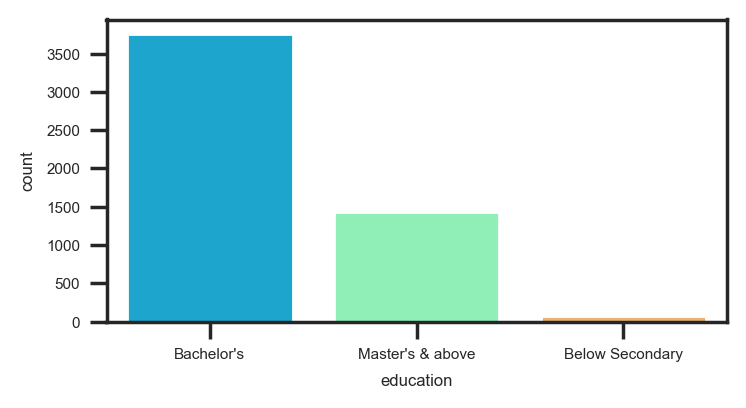

In [24]:
plt.figure(figsize=(4,2), dpi=200)
sns.set(style='ticks', font_scale=0.5)
sns.countplot(x='education', data=df, palette='rainbow');

Visual Representation: Previous Year Rating (*Numeric*)

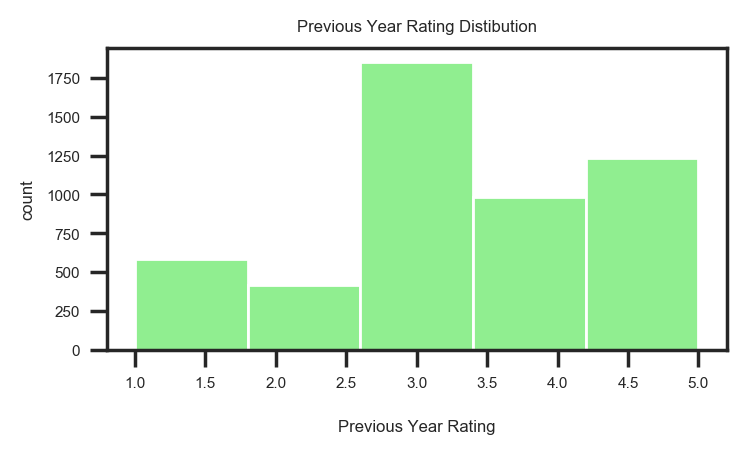

In [25]:
plt.figure(figsize=(4,2), dpi=200)
sns.set(style='ticks', font_scale=0.5)
plt.hist('previous_year_rating', data=df, bins=5, color='lightgreen')
plt.xlabel('\nPrevious Year Rating')
plt.ylabel('count')
plt.title('Previous Year Rating Distibution');

   From the above visualizations we can clearly see that the most frequent value under `education` variable is `Bachelor's` and the `mean` value is around `3.0` under `previous_year_rating` variable
   
   Hence, we will replace them appropriate values respectively

In [26]:
df.education.mode()

0    Bachelor's
dtype: object

In [27]:
df.education = df.education.fillna('Bachelor\'s')

In [28]:
rating = round(df.previous_year_rating.mean(), 0)
rating

3.0

In [29]:
df.previous_year_rating = df.previous_year_rating.fillna(rating)

    Now rechecking for missing values using heatmap

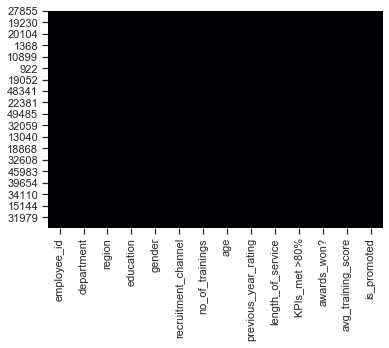

In [30]:
sns.set(style='ticks', font_scale=1)
sns.heatmap(df.isnull(), cbar=False, cmap='magma');

    All missing data has been successfully replaced with appropriate values

## 4. Visual Exploratory Data Analysis - EDA

We will convert all `object`(string) data types to `category` data types to reduce the memory usage

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5481 entries, 27855 to 3182
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           5481 non-null   int64  
 1   department            5481 non-null   object 
 2   region                5481 non-null   object 
 3   education             5481 non-null   object 
 4   gender                5481 non-null   object 
 5   recruitment_channel   5481 non-null   object 
 6   no_of_trainings       5481 non-null   int64  
 7   age                   5481 non-null   int64  
 8   previous_year_rating  5481 non-null   float64
 9   length_of_service     5481 non-null   int64  
 10  KPIs_met >80%         5481 non-null   int64  
 11  awards_won?           5481 non-null   int64  
 12  avg_training_score    5481 non-null   int64  
 13  is_promoted           5481 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 663.3+ KB


In [32]:
df.department = df.department.astype('category')
df.region = df.region.astype('category')
df.education = df.education.astype('category')
df.gender = df.gender.astype('category')
df.recruitment_channel = df.recruitment_channel.astype('category')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5481 entries, 27855 to 3182
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   employee_id           5481 non-null   int64   
 1   department            5481 non-null   category
 2   region                5481 non-null   category
 3   education             5481 non-null   category
 4   gender                5481 non-null   category
 5   recruitment_channel   5481 non-null   category
 6   no_of_trainings       5481 non-null   int64   
 7   age                   5481 non-null   int64   
 8   previous_year_rating  5481 non-null   float64 
 9   length_of_service     5481 non-null   int64   
 10  KPIs_met >80%         5481 non-null   int64   
 11  awards_won?           5481 non-null   int64   
 12  avg_training_score    5481 non-null   int64   
 13  is_promoted           5481 non-null   int64   
dtypes: category(5), float64(1), int64(8)
memory usage: 5

    The memory usage has been reduced to 583.6 KB from 663.3+ KB

**Employee Promotion Count**

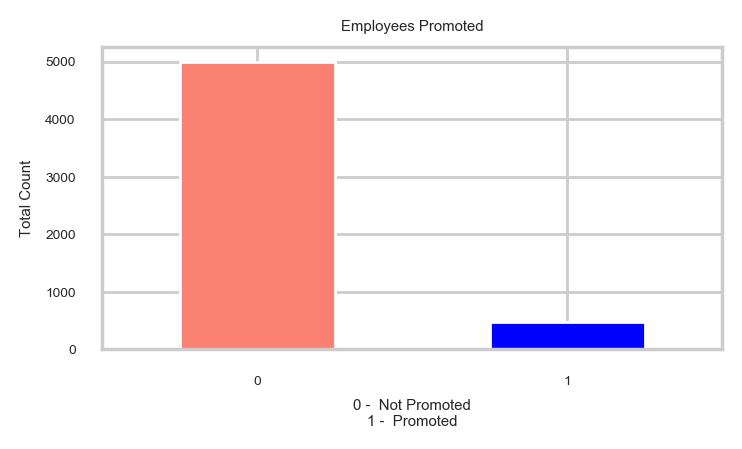

In [93]:
plt.figure(figsize=(4,2), dpi=200)
sns.set(style='whitegrid', font_scale=0.45)
df.is_promoted.value_counts().plot.bar(color=['salmon', 'blue'])
plt.xticks(rotation = 0)
plt.title('Employees Promoted')
plt.xlabel('0 -  Not Promoted\n1 -  Promoted')
plt.ylabel('Total Count');

**Gender vs Promotion**

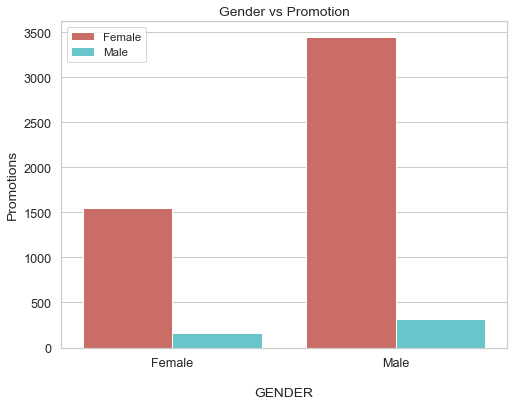

In [89]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x='gender', hue='is_promoted', data=df, palette='hls')
sns.set(style='whitegrid', font_scale=1.15)
ax.set(title = 'Gender vs Promotion',
       xlabel = '\nGENDER',
      ylabel = 'Promotions')

ax.legend(['Female', 'Male'], fontsize='small', loc='upper left');

**Department vs Promotion**

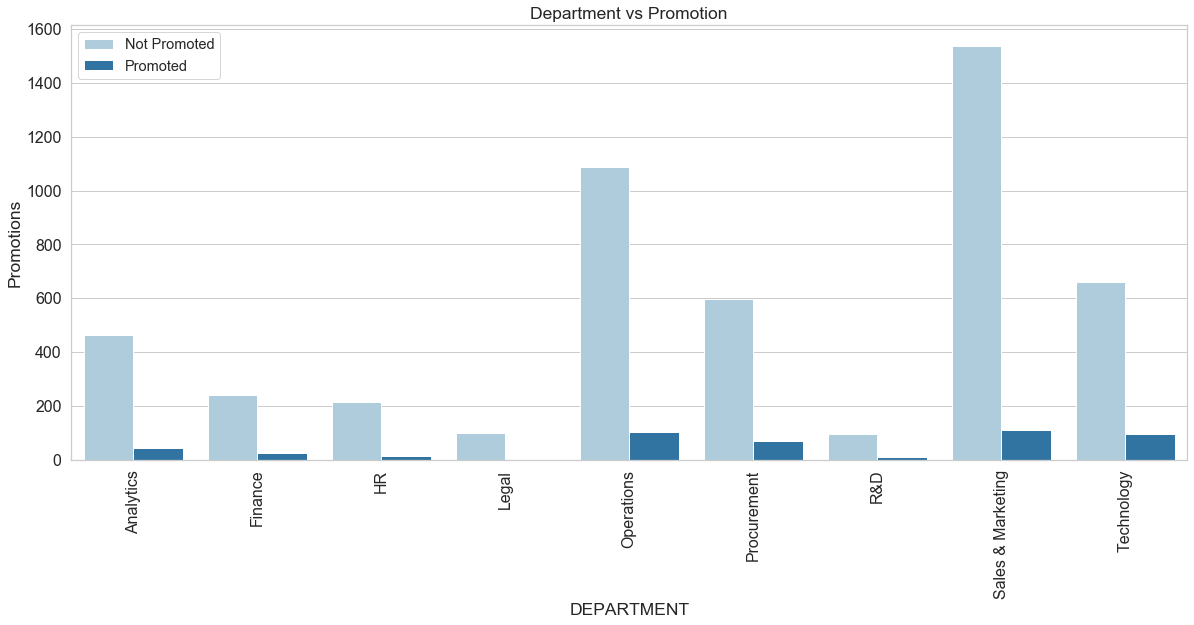

In [85]:
fig, ax = plt.subplots(figsize = (20,8))
ax = sns.countplot(x='department', hue='is_promoted', data=df, palette='Paired')
sns.set(style='whitegrid', font_scale=1.45)
ax.set(title = 'Department vs Promotion',
       xlabel = 'DEPARTMENT',
      ylabel = 'Promotions')

ax.legend(['Not Promoted', 'Promoted'], fontsize='small', loc='upper left')
plt.xticks(rotation=90);

**Education vs Promotion**

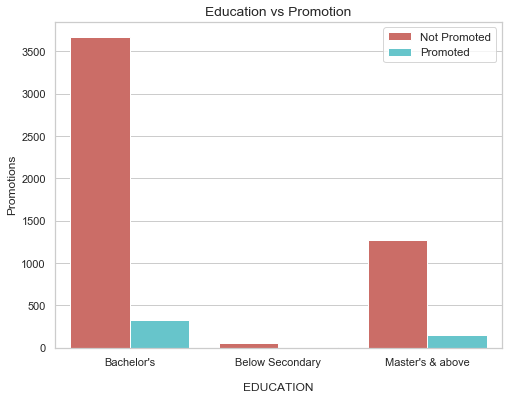

In [80]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x='education', hue='is_promoted', data=df, palette='hls')
sns.set(style='whitegrid', font_scale=1.15)
ax.set(title = 'Education vs Promotion',
       xlabel = '\nEDUCATION',
      ylabel = 'Promotions')
plt.legend(['Not Promoted', 'Promoted'], fontsize='small');

**Recruitment Channel vs Promotion**

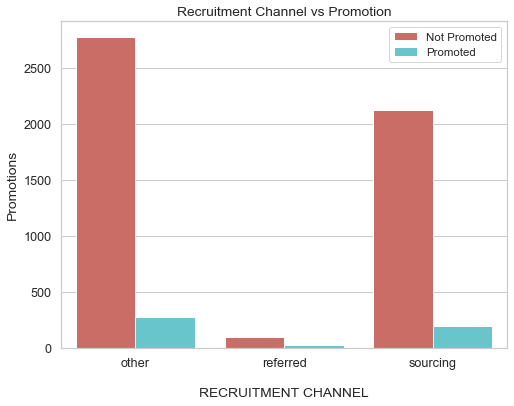

In [38]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x='recruitment_channel', hue='is_promoted', data=df, palette='hls')
sns.set(style='whitegrid', font_scale=1.15)
ax.set(title = 'Recruitment Channel vs Promotion',
       xlabel = '\nRECRUITMENT CHANNEL',
      ylabel = 'Promotions')

ax.legend(['Not Promoted', 'Promoted'], fontsize='small');

**Age Distribution**

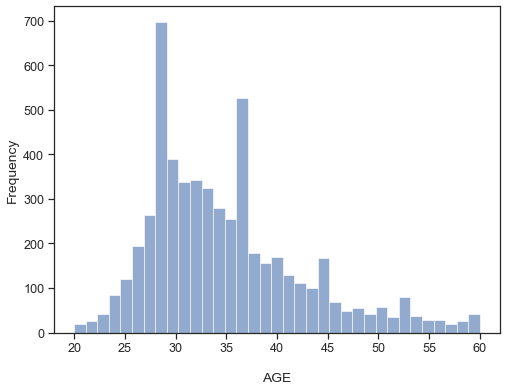

In [39]:
plt.figure(figsize=(8,6))
sns.set(style='ticks', font_scale=1.15)
df.age.plot.hist(bins=35, label='Age', alpha=0.6)
plt.xlabel('\nAGE');

**Length of Service Distribution**

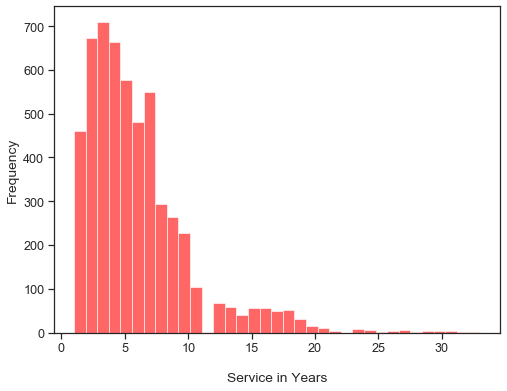

In [40]:
plt.figure(figsize=(8,6))
sns.set(style='ticks', font_scale=1.15)
df.length_of_service.plot.hist(bins=35, label='Service in Years', color='red', alpha=0.6)
plt.xlabel('\nService in Years');

**Average Training Score Distribution**

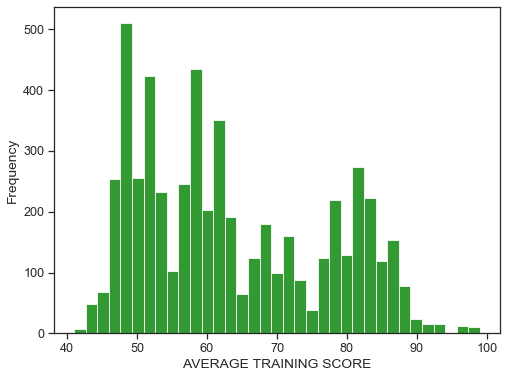

In [41]:
plt.figure(figsize=(8,6))
df['avg_training_score'].plot.hist(bins=35, color='green', alpha=0.8)
plt.xlabel('AVERAGE TRAINING SCORE');

**Trainings vs Promotion**

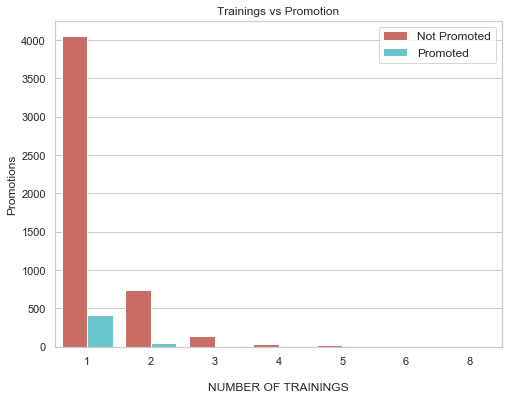

In [79]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x='no_of_trainings', hue='is_promoted', data=df, palette='hls')
sns.set(style='whitegrid', font_scale=1)
ax.set(title = 'Trainings vs Promotion',
       xlabel = '\nNUMBER OF TRAININGS',
      ylabel = 'Promotions')

ax.legend(['Not Promoted', 'Promoted'], fontsize='medium', loc='upper right');

**Ratings vs Promotion**

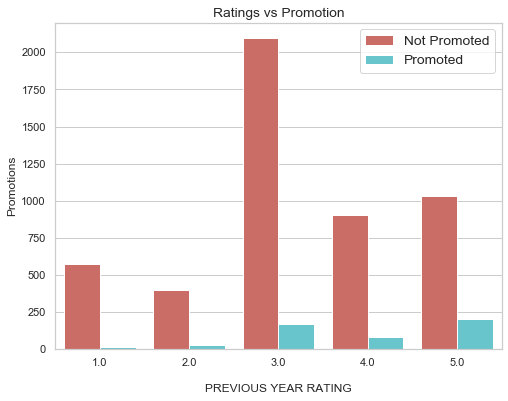

In [43]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x='previous_year_rating', hue='is_promoted', data=df, palette='hls')
sns.set(style='whitegrid', font_scale=1.15)
ax.set(title = 'Ratings vs Promotion',
       xlabel = '\nPREVIOUS YEAR RATING',
      ylabel = 'Promotions')

ax.legend(['Not Promoted', 'Promoted'], fontsize='medium');

**KPIs Met vs Promotion**

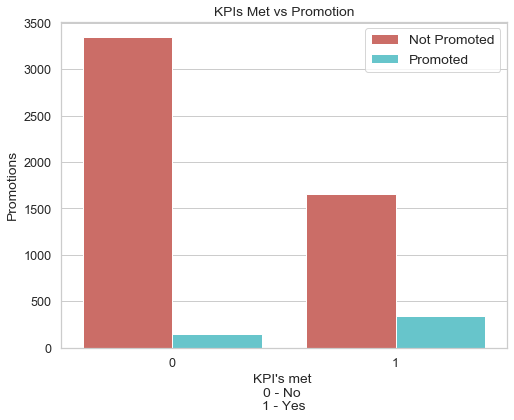

In [44]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x='KPIs_met >80%', hue='is_promoted', data=df, palette='hls')
sns.set(style='whitegrid', font_scale=1.15)
ax.set(title = 'KPIs Met vs Promotion', 
      ylabel = 'Promotions')
plt.xlabel('KPI\'s met \n0 - No \n1 - Yes')
ax.legend(['Not Promoted', 'Promoted'], fontsize='medium');

**Awards Won vs Promotion**

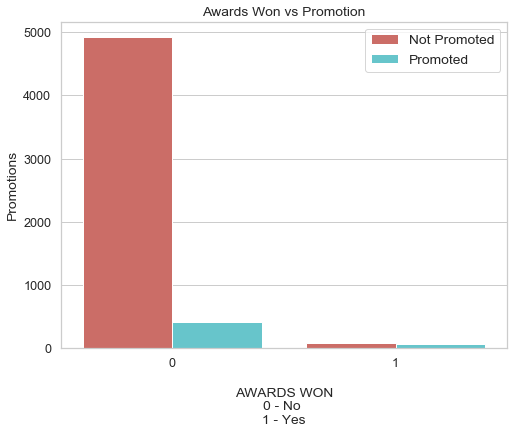

In [45]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x='awards_won?', hue='is_promoted', data=df, palette='hls')
sns.set(style='whitegrid', font_scale=1.15)
ax.set(title = 'Awards Won vs Promotion',
       xlabel = '\nAWARDS WON\n0 - No \n1 - Yes',
      ylabel = 'Promotions')

ax.legend(['Not Promoted', 'Promoted'], fontsize='medium');

**Departments vs Promotion**

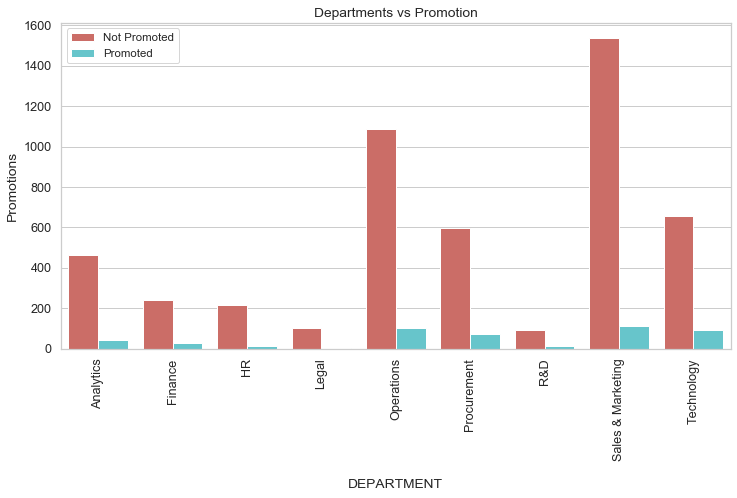

In [95]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot('department', hue='is_promoted', data=df, palette='hls')
sns.set(style='whitegrid', font_scale=1.15)
ax.set(title = 'Departments vs Promotion',
       xlabel = '\nDEPARTMENT',
      ylabel = 'Promotions')
plt.xticks(rotation=90)
ax.legend(['Not Promoted', 'Promoted'], fontsize='small');

**Region vs Promotion**

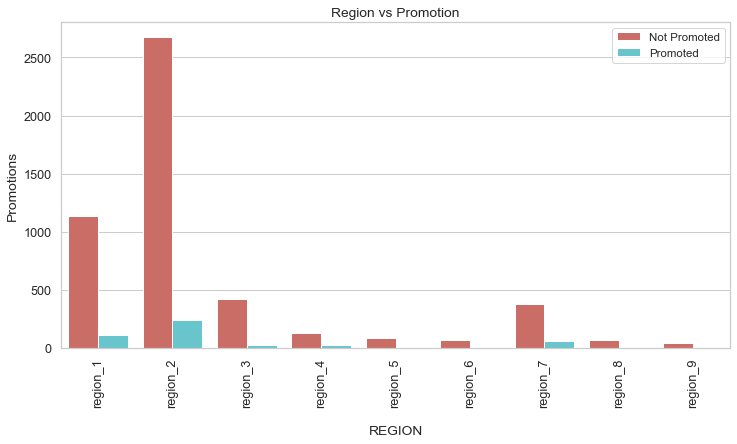

In [47]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot('region', hue='is_promoted', data=df, palette='hls')
sns.set(style='whitegrid', font_scale=1.15)
ax.set(title = 'Region vs Promotion',
       xlabel = '\nREGION',
      ylabel = 'Promotions')
plt.xticks(rotation=90)
ax.legend(['Not Promoted', 'Promoted'], fontsize='small');

In [48]:
from matplotlib import pyplot
from matplotlib import pylab

**Scatter Plot - Lenght of Service vs Age**

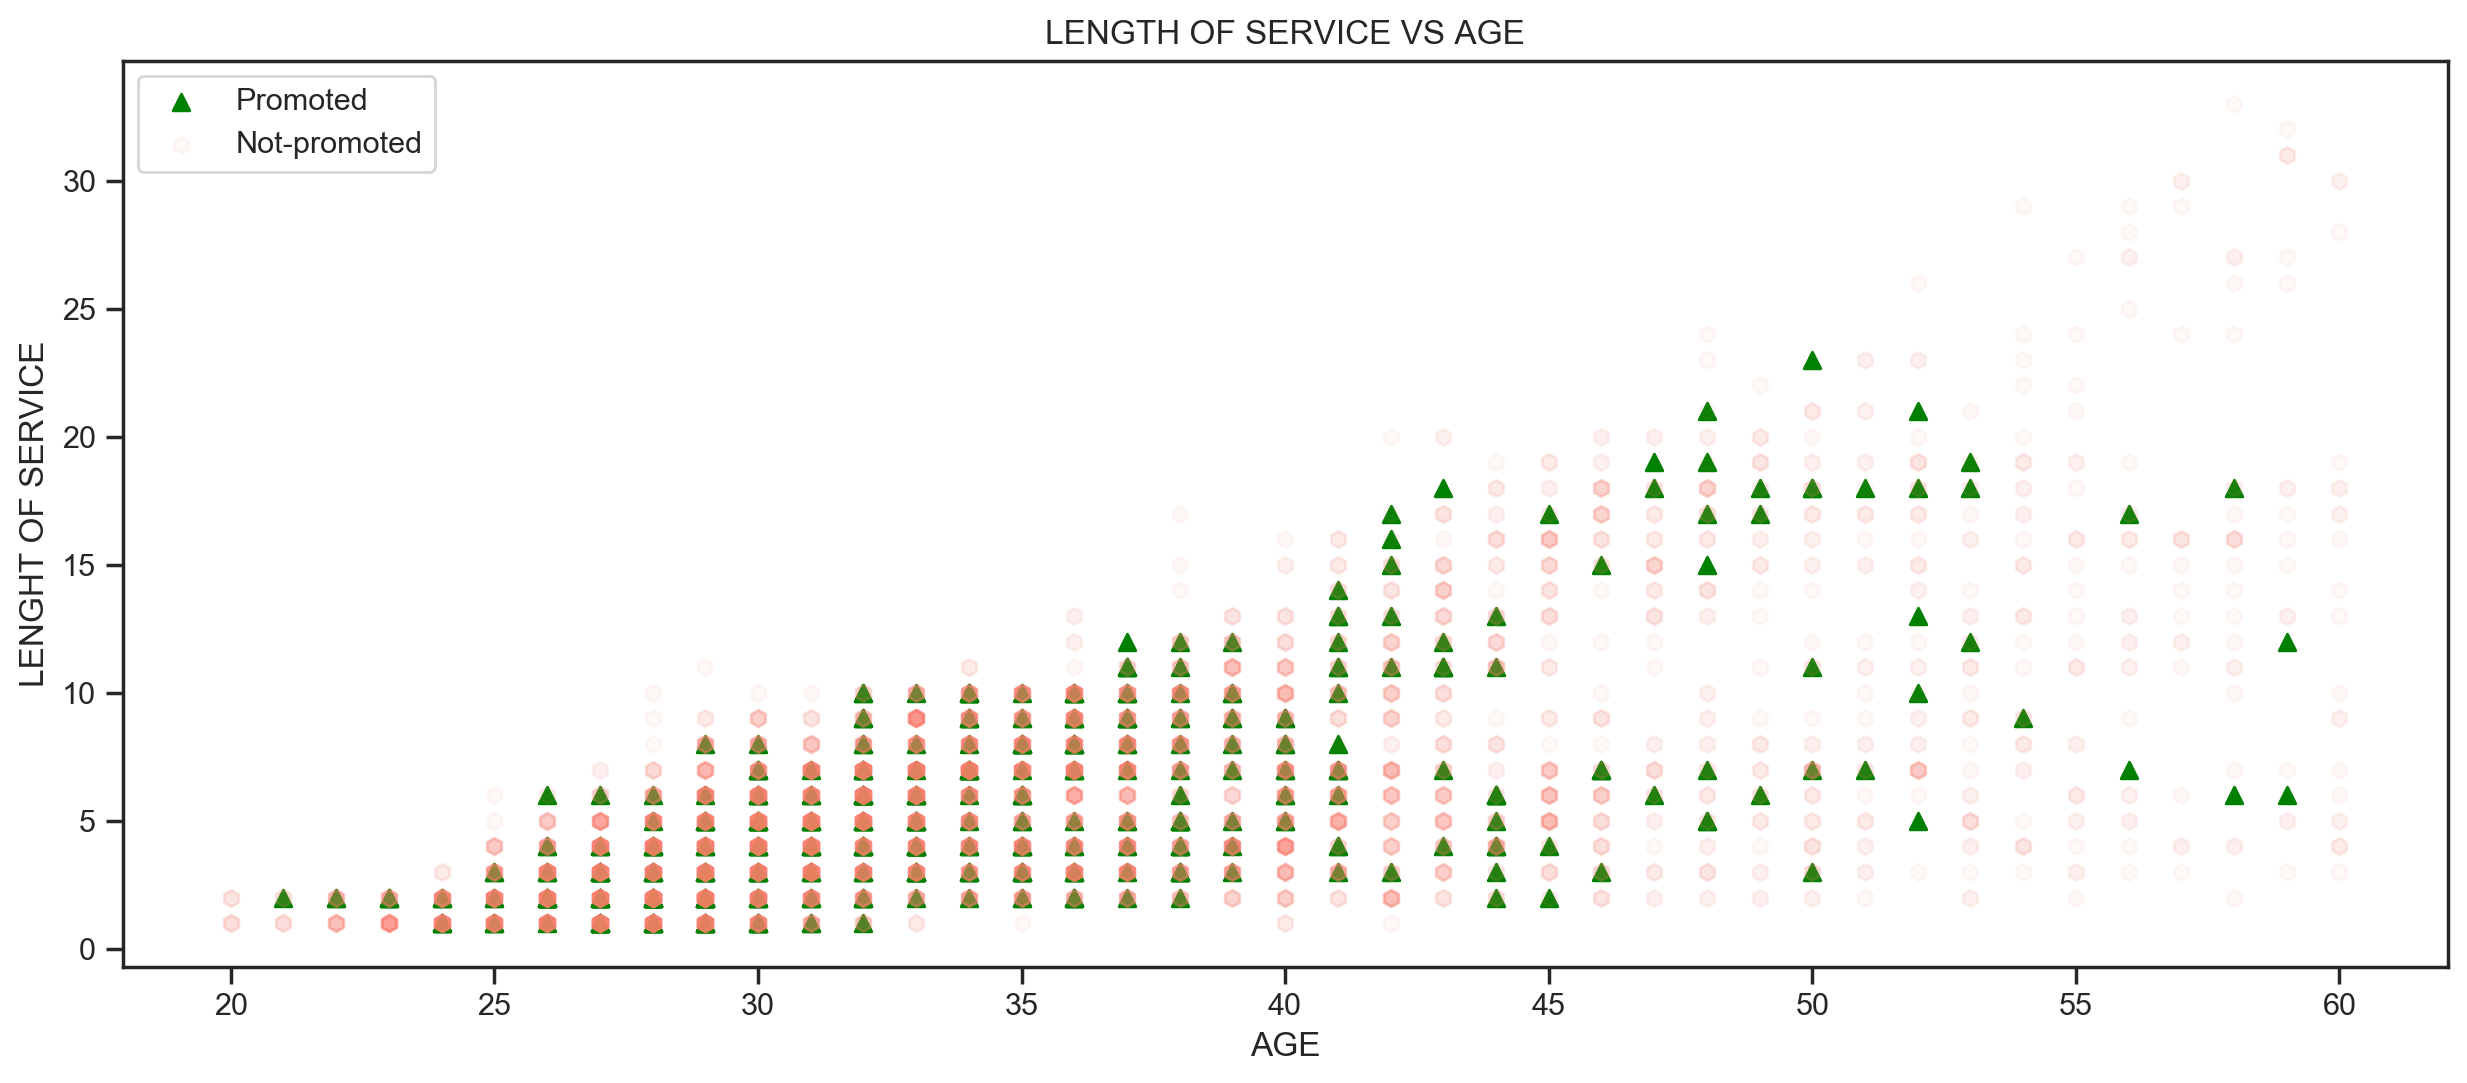

In [49]:
plt.figure(figsize=(15,6), dpi=200)
sns.set(style='ticks', font_scale=1)

# Employees who got promotion
plt.scatter(df.age[df.is_promoted == 1], df.length_of_service[df.is_promoted == 1],
           c='green', marker='^')

# Employees who didn't get promotion
plt.scatter(df.age[df.is_promoted == 0], df.length_of_service[df.is_promoted == 0],
            c='salmon', alpha=0.05, marker='h')

plt.legend(['Promoted', 'Not-promoted'])
plt.xlabel('AGE')
plt.ylabel('LENGHT OF SERVICE')
plt.title('LENGTH OF SERVICE VS AGE');

**Scatter Plot - Average Training Score vs Age**

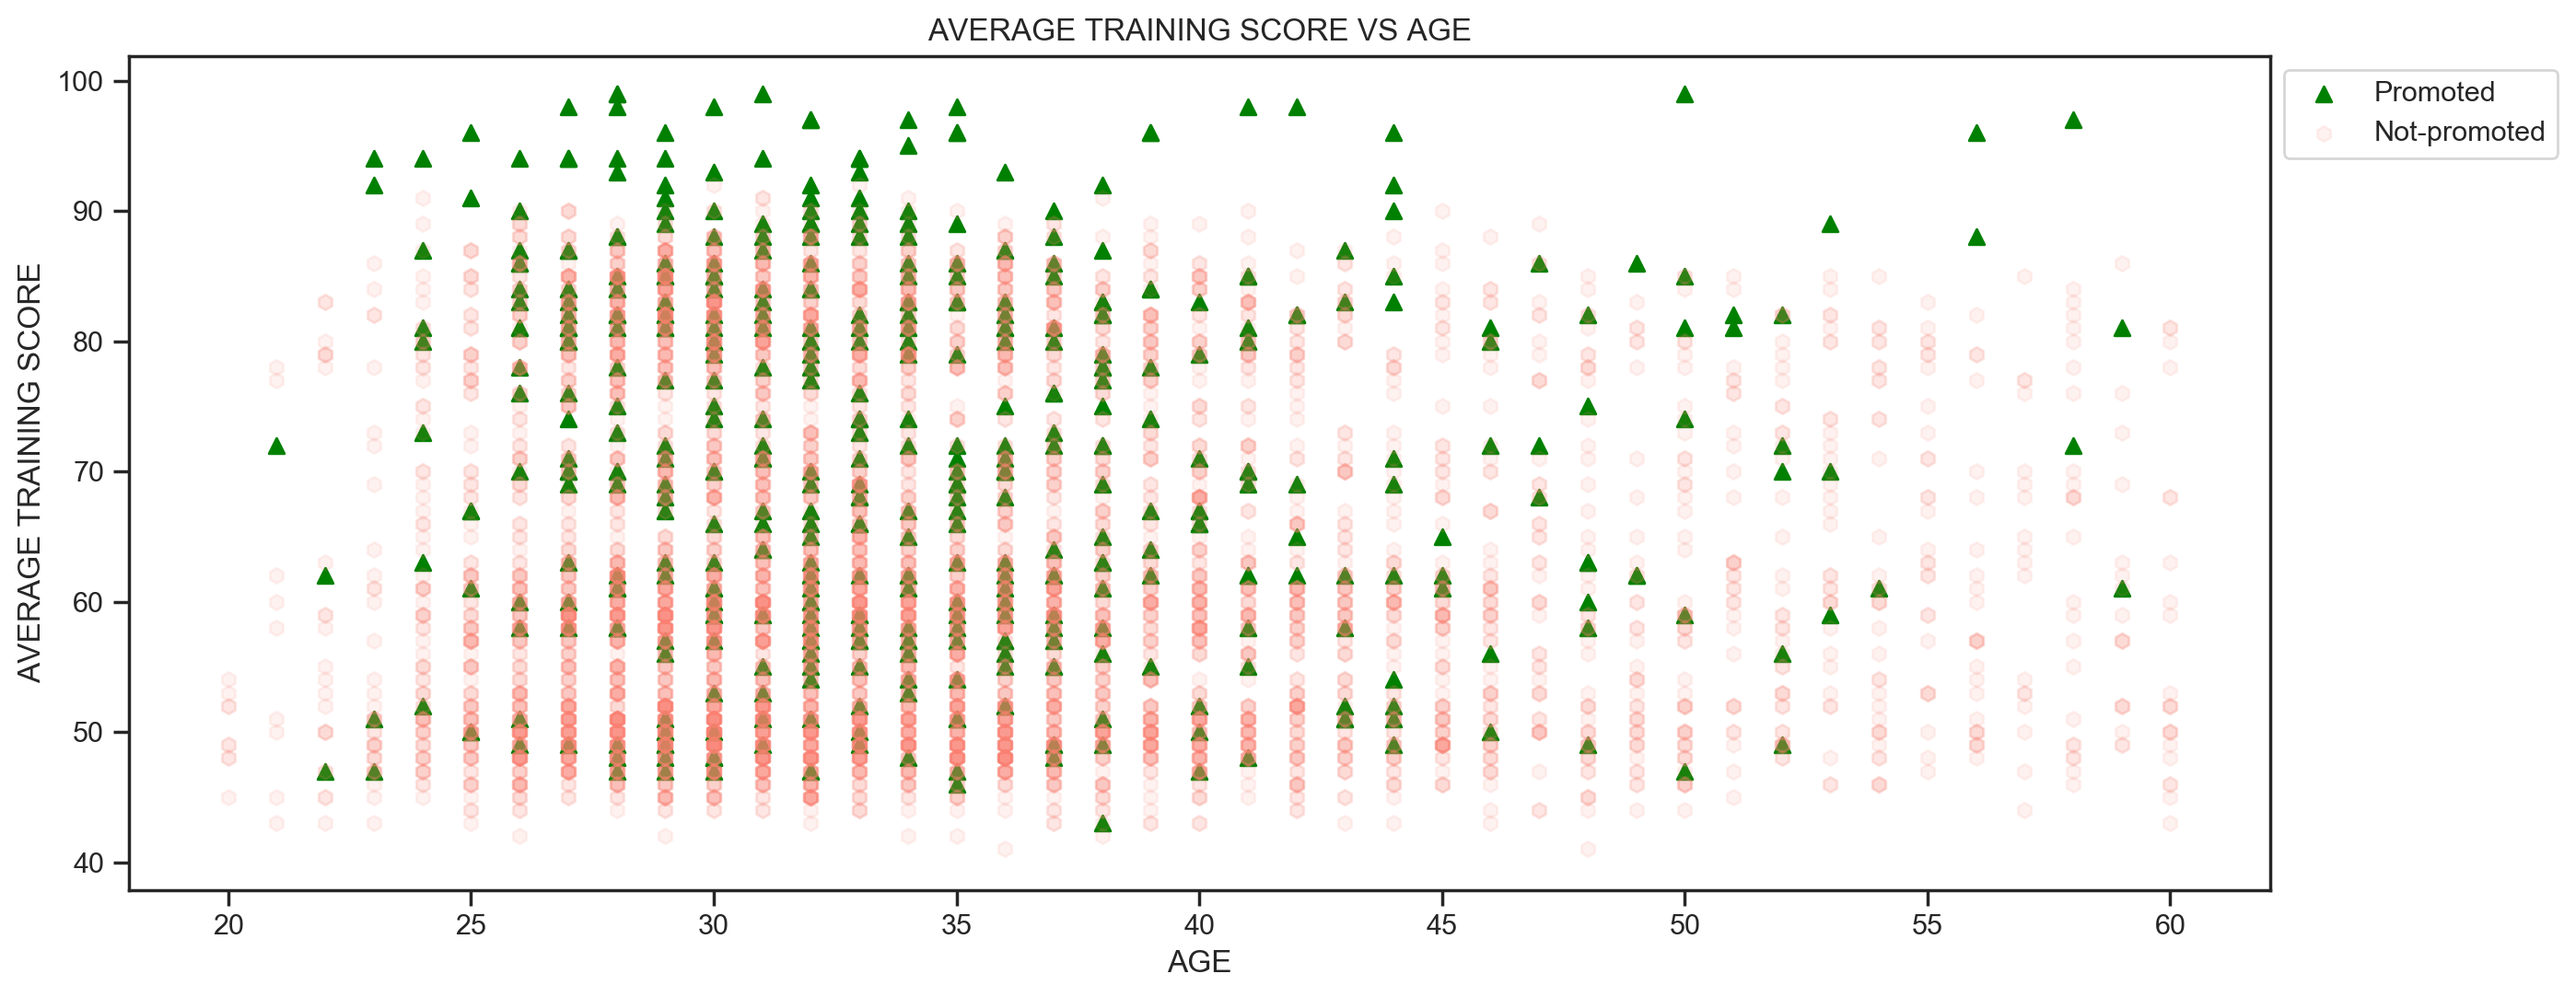

In [50]:
plt.figure(figsize=(15,6), dpi=200)
sns.set(style='ticks', font_scale=1)

# Employees who got promotion
plt.scatter(df.age[df.is_promoted == 1], df.avg_training_score[df.is_promoted == 1],marker='^',
           c='green')

# Employees who didn't get promotion
plt.scatter(df.age[df.is_promoted == 0], df.avg_training_score[df.is_promoted == 0],marker='h', 
            alpha=0.1, c='salmon')

plt.legend(['Promoted', 'Not-promoted'], bbox_to_anchor=(1,1), loc='upper left')
plt.xlabel('AGE')
plt.ylabel('AVERAGE TRAINING SCORE')
plt.title('AVERAGE TRAINING SCORE VS AGE');

**Scatter Plot - Average Training Score vs Length of Service**

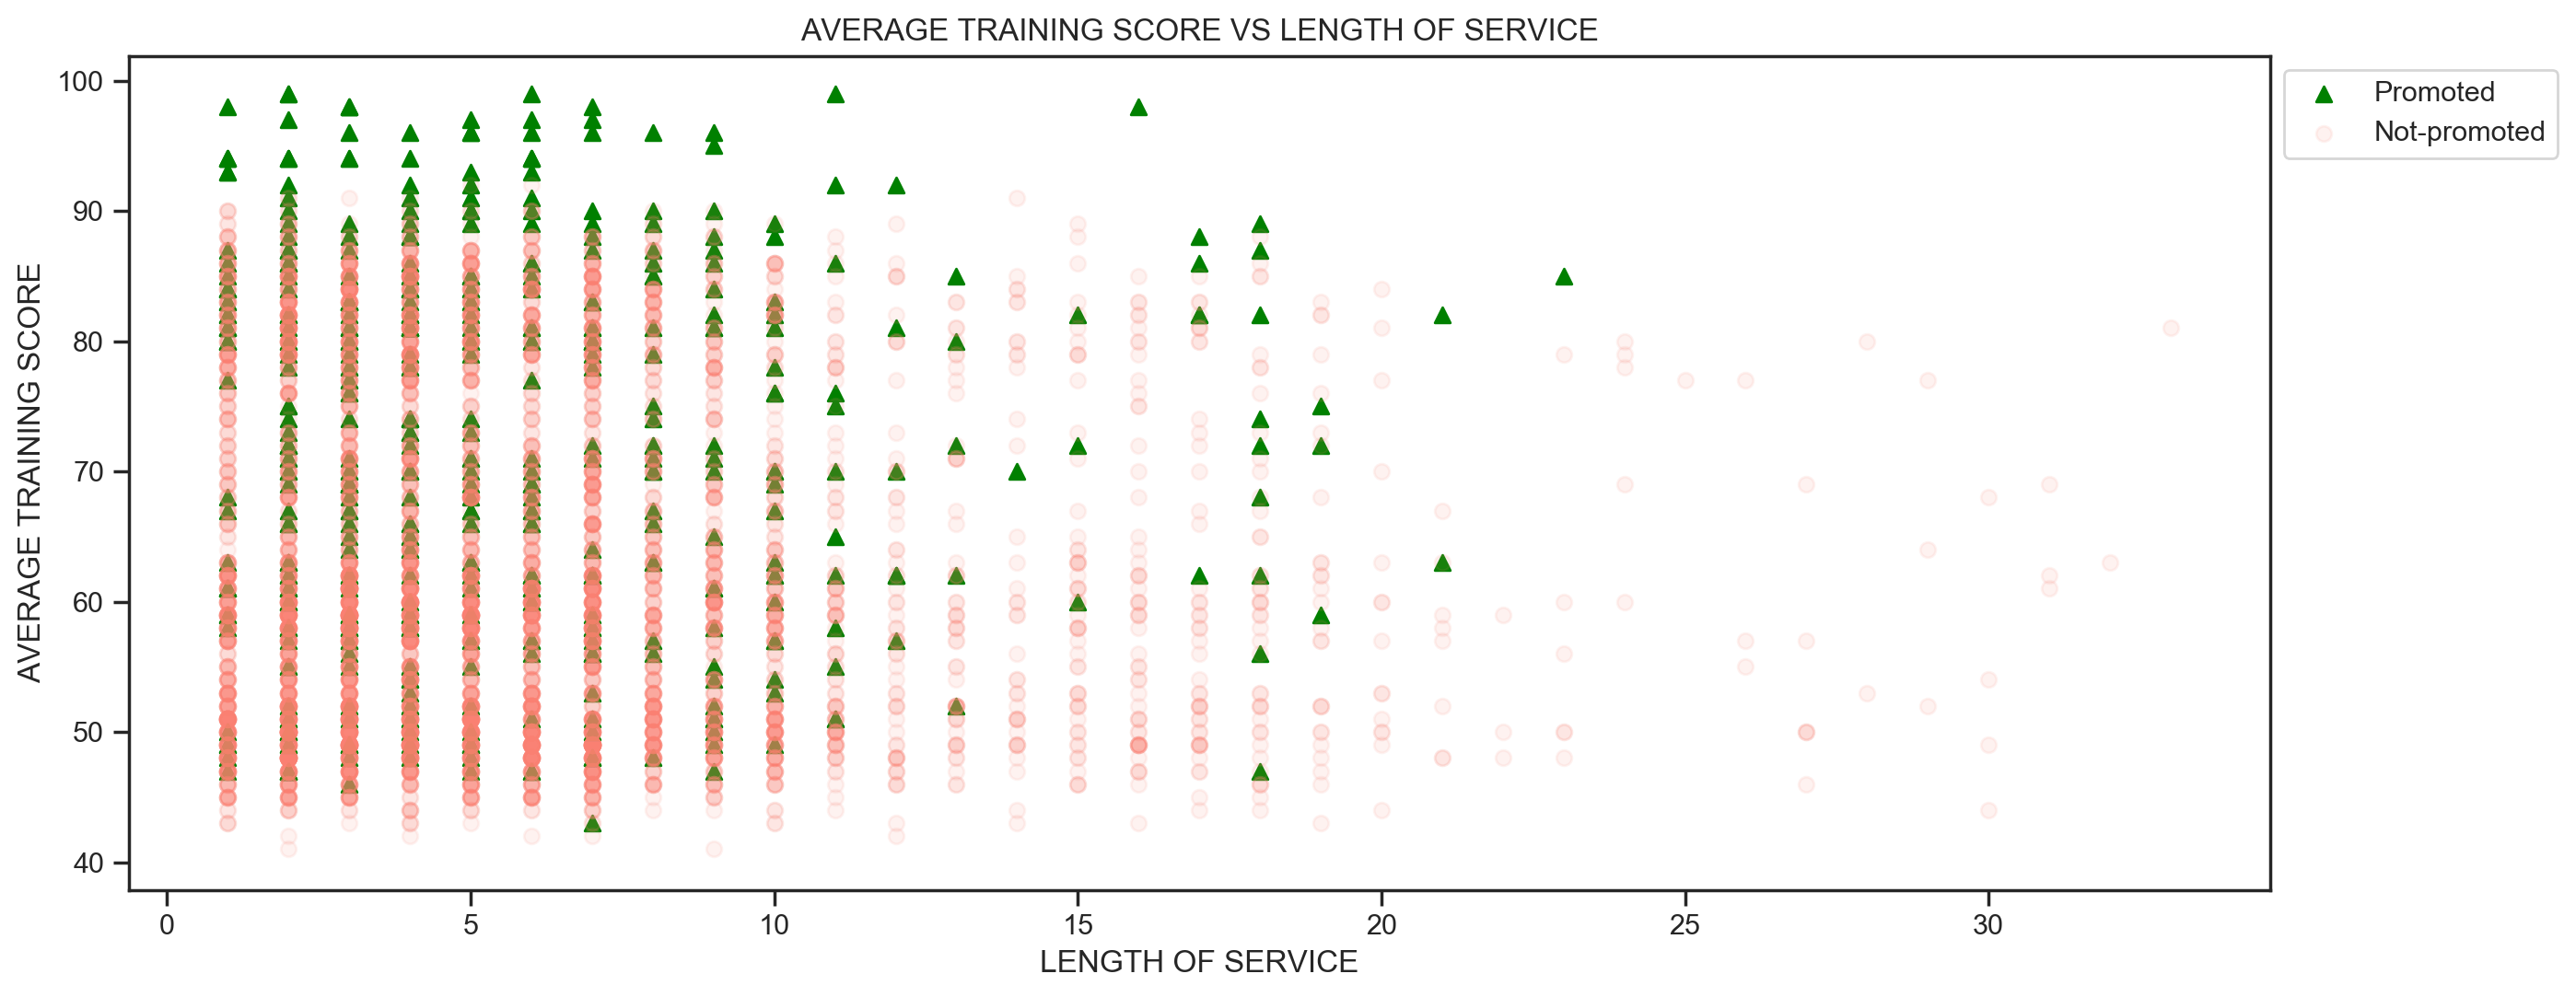

In [51]:
plt.figure(figsize=(15,6), dpi=200)
sns.set(style='ticks', font_scale=1)

# Employees who got promotion
plt.scatter(df.length_of_service[df.is_promoted == 1], df.avg_training_score[df.is_promoted == 1], 
            c='green', marker='^')

# Employees who didn't get promotion
plt.scatter(df.length_of_service[df.is_promoted == 0], df.avg_training_score[df.is_promoted == 0],
            c='salmon', alpha=0.1)

plt.legend(['Promoted', 'Not-promoted'], bbox_to_anchor=(1,1), loc='upper left')
plt.xlabel('LENGTH OF SERVICE')
plt.ylabel('AVERAGE TRAINING SCORE')
plt.title('AVERAGE TRAINING SCORE VS LENGTH OF SERVICE');

**Promotions with respect to AGE and KPI's met**

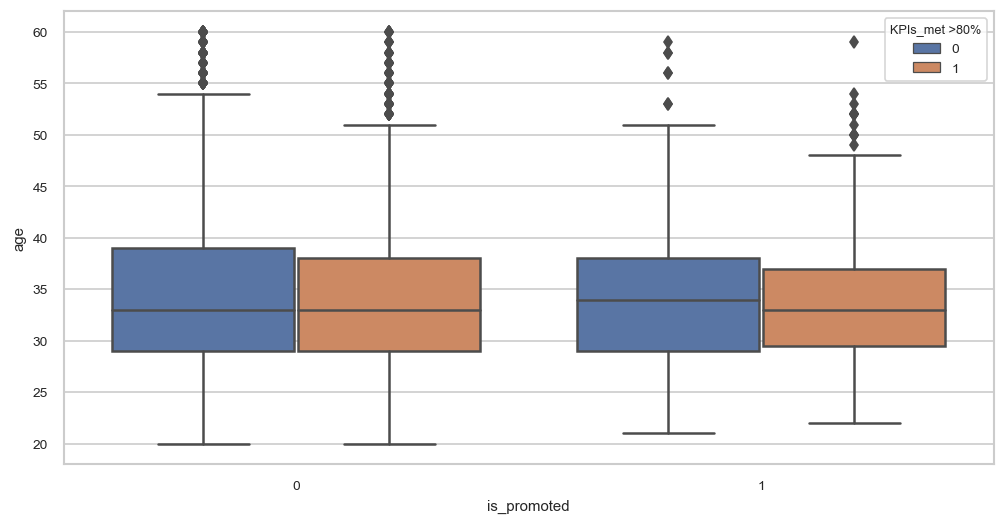

In [52]:
plt.figure(figsize=(10,5), dpi=120)
sns.set(style='whitegrid', font_scale=0.75)
sns.boxplot(x='is_promoted', y='age', data=df, hue='KPIs_met >80%');

**Promotions with respect to Service Length and KPI's met**

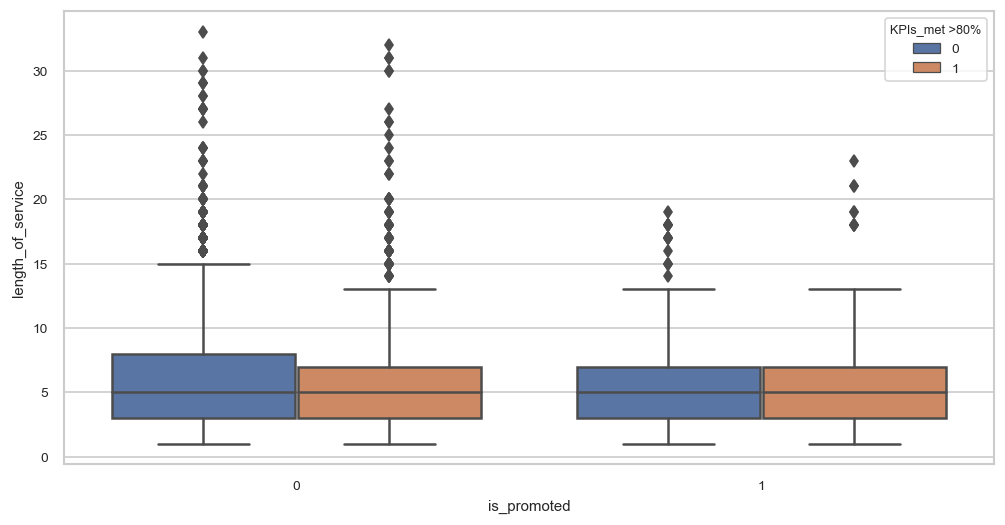

In [53]:
plt.figure(figsize=(10,5), dpi=120)
sns.set(style='whitegrid', font_scale=0.75)
sns.boxplot(x='is_promoted', y='length_of_service', data=df, hue='KPIs_met >80%');

**Promtions with respect to AGE and AWARDS won**

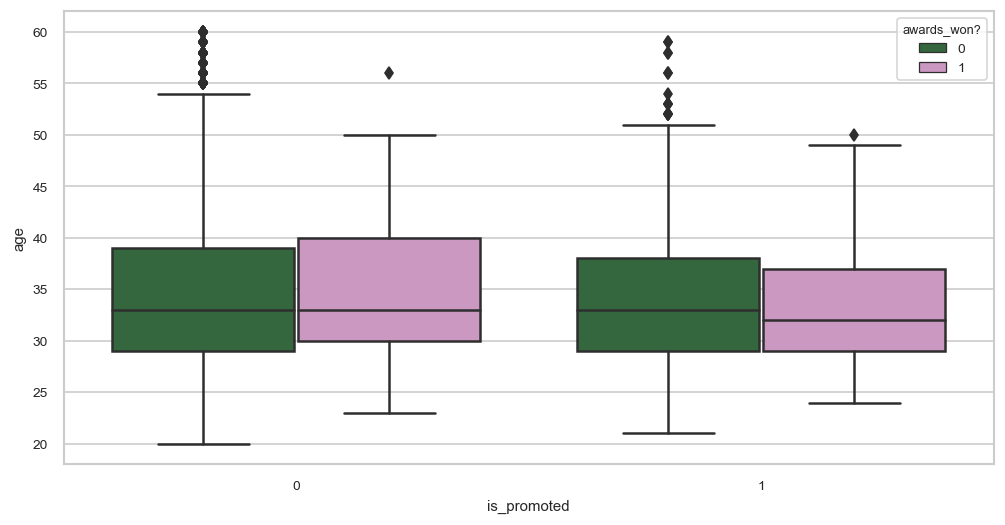

In [54]:
plt.figure(figsize=(10,5), dpi=120)
sns.set(style='whitegrid', font_scale=0.75)
sns.boxplot(x='is_promoted', y='age', data=df, orient='v', palette='cubehelix', hue='awards_won?');

**Promotions with respect to SERVICE LENGHT and AWARDS won**

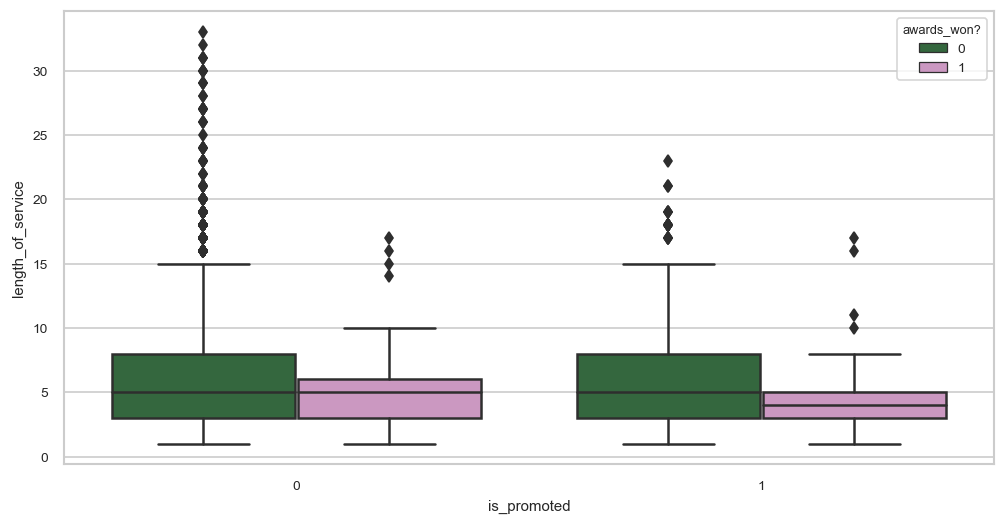

In [55]:
plt.figure(figsize=(10,5), dpi=120)
sns.set(style='whitegrid', font_scale=0.75)
sns.boxplot(x='is_promoted', y='length_of_service', data=df, orient='v', palette='cubehelix', hue='awards_won?');

**Promtions with respect to AGE and GENDER**

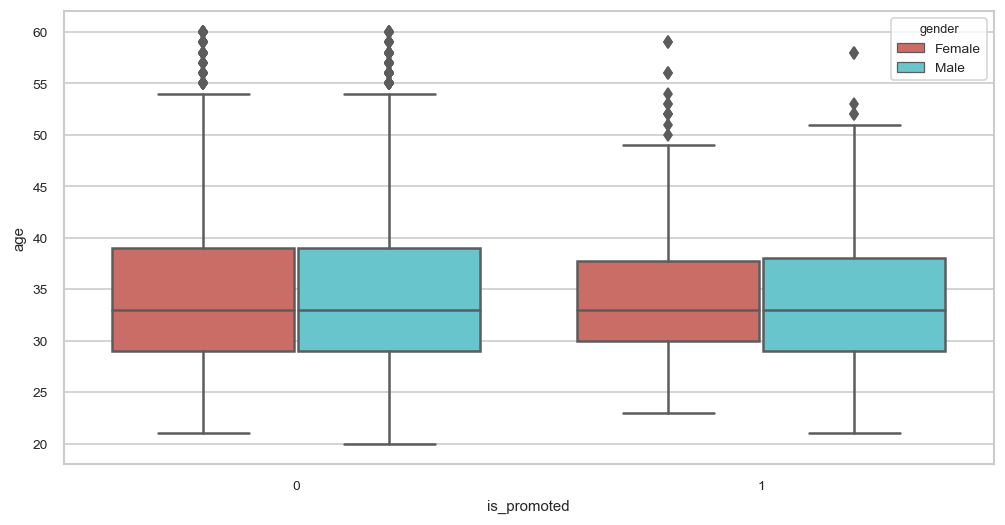

In [56]:
plt.figure(figsize=(10,5), dpi=120)
sns.set(style='whitegrid', font_scale=0.75)
sns.boxplot(x='is_promoted', y='age', data=df, palette='hls', hue='gender');

**Promotions with respect to SERVICE LENGHT and GENDER**

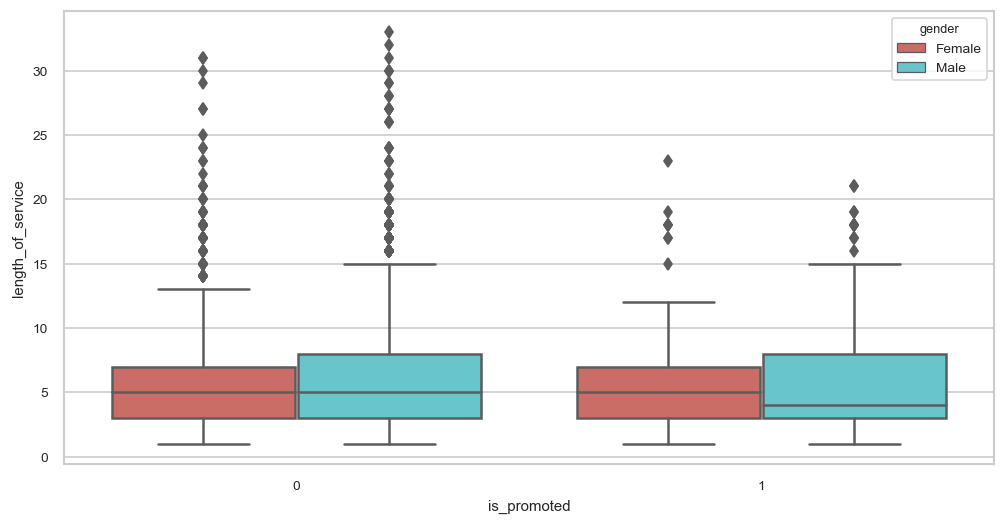

In [57]:
plt.figure(figsize=(10,5), dpi=120)
sns.set(style='whitegrid', font_scale=0.75)
sns.boxplot(x='is_promoted', y='length_of_service', data=df, orient='v', palette='hls', hue='gender');

### 4.1. Correlation Matrix

* We will build a correlation matrix to measure to what extent different variables are correlated i.e. how change in one variable is going to impact change in correlated variable
* We will use Pearson Correlation to measure the Correlation coefficient

   **Correlation coefficient** : Values between 0 - 1
    * Close to +1 = Large Positive relationship
    * Close to -1 = Large Negative relationship
    * Close to 0  = No relationship

    We would observe the Correlation coefficients for different variables and eliminate those with less importance to avoid affecting our model accuracy.

In [58]:
df.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.007190,-0.006274,0.010601,0.000427,-0.011218,0.009119,0.020283,0.026821
no_of_trainings,-0.007190,1.000000,-0.094203,-0.052240,-0.069831,-0.050704,-0.016624,0.048220,-0.036284
age,-0.006274,-0.094203,1.000000,0.022143,0.658720,-0.024088,-0.014427,-0.042772,-0.015904
previous_year_rating,0.010601,-0.052240,0.022143,1.000000,0.026982,0.361139,0.024471,0.064406,0.143381
length_of_service,0.000427,-0.069831,0.658720,0.026982,1.000000,-0.071973,-0.045535,-0.044427,-0.015867
KPIs_met >80%,-0.011218,-0.050704,-0.024088,0.361139,-0.071973,1.000000,0.089211,0.067993,0.219278
awards_won?,0.009119,-0.016624,-0.014427,0.024471,-0.045535,0.089211,1.000000,0.094595,0.212953
avg_training_score,0.020283,0.048220,-0.042772,0.064406,-0.044427,0.067993,0.094595,1.000000,0.194526
is_promoted,0.026821,-0.036284,-0.015904,0.143381,-0.015867,0.219278,0.212953,0.194526,1.000000


**Correlation Heatmap**

<Figure size 432x288 with 0 Axes>

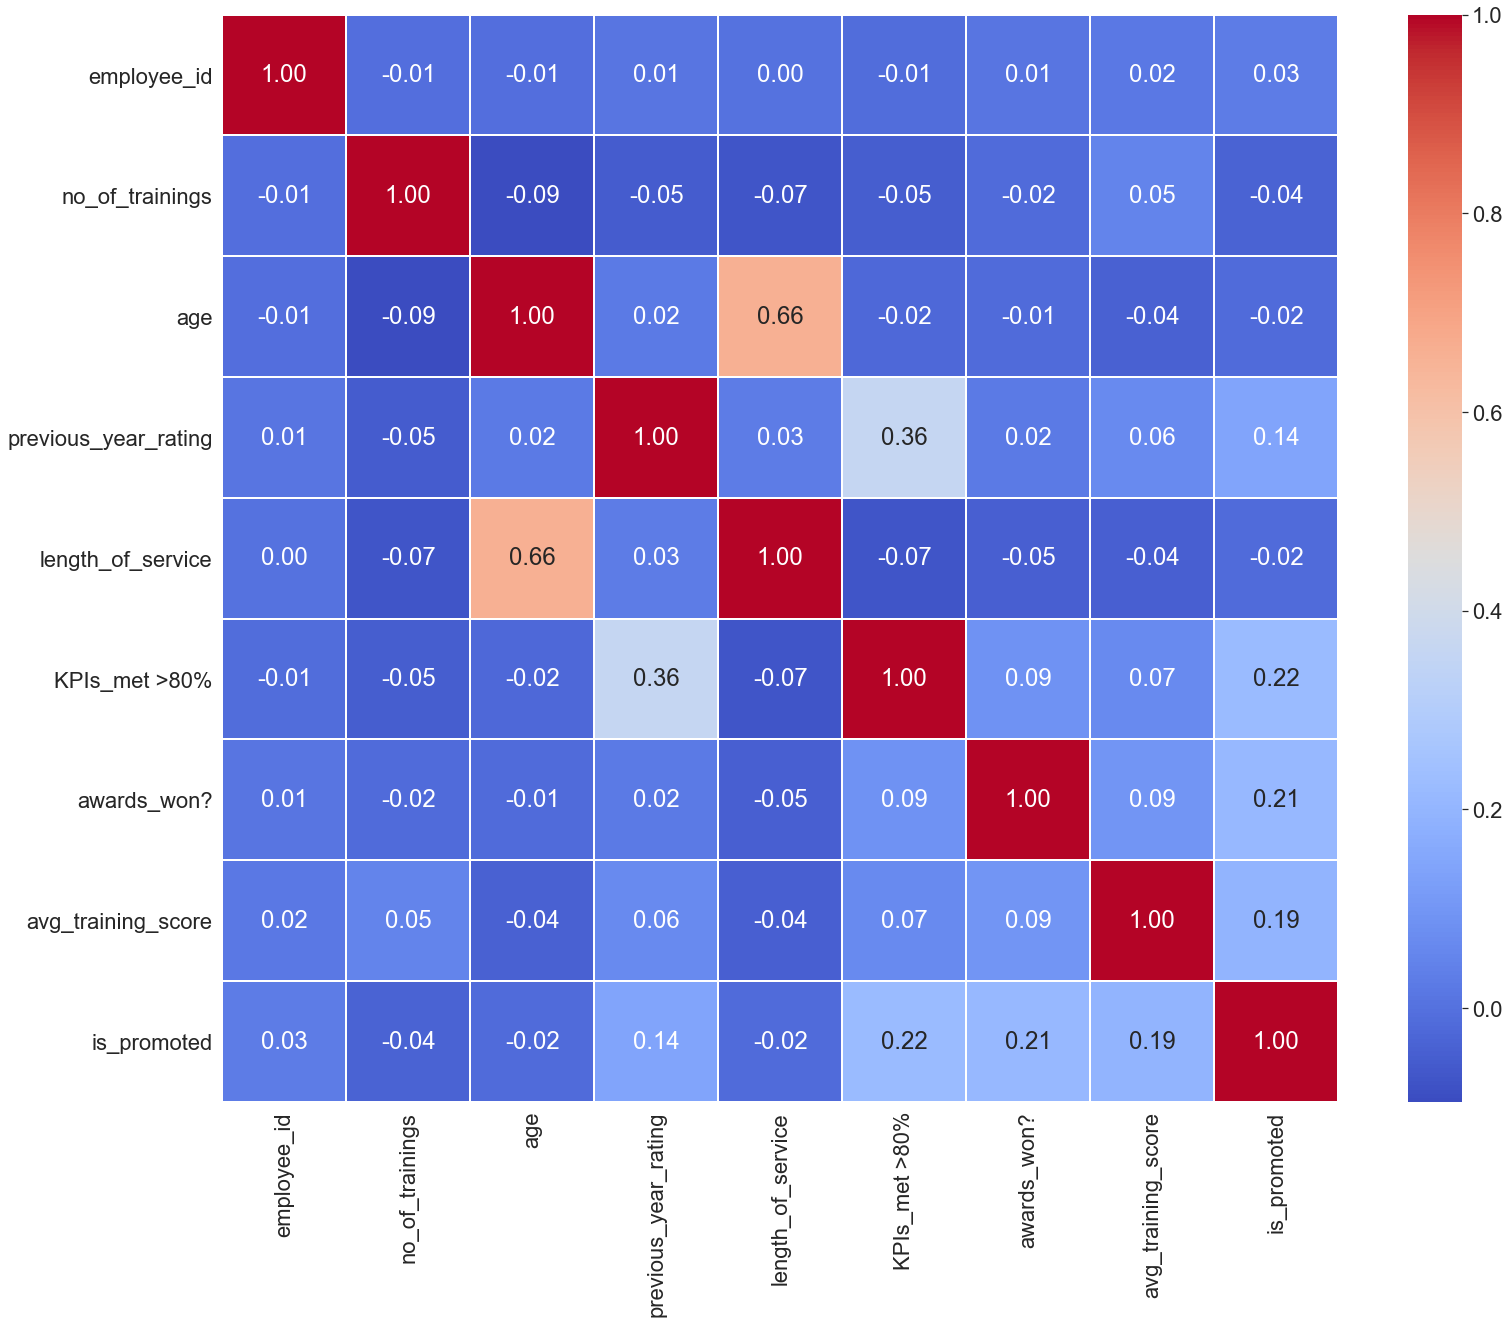

In [99]:
### Seaborn Heatmap
plt.figure()
fig, ax = plt.subplots(figsize=(25,20))
sns.set(font_scale=2)
ax = sns.heatmap(df.corr(),
                annot=True,
                linewidths=1,
                fmt='.2f',
                cmap='coolwarm');

Since there are no variables that are highly correlated we don't have the need to eliminate any variables from our dataset.

Next we will build our Model

## 5. Model Development

From the problem definition and data description we know that the problem is binary i.e. the client wants us to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

*Binary Problem: Trying to predict either of two outcomes such as 0 or 1, Yes or No, Fit or Unfit, etc.*

To solve our problem we will use Statistical Classification techniques and build machine learning algorithms.
We will specifically use three algorithms namely `Logistic Regression`, `Random Forest Classifiers` and `K Nearest Neighbours`.
We will compare all three models for accuracy and further try to improve them. Our aim to build a model with high accuracy and low error rate

    We will build our models using the industry standard machine learning librabry called Scikit-learn.
    
    We will also import packages from the library as needed while building the models

### 5.1. Spliting our data into X and y

**Here y will represent the target variable seperately**

In [60]:
X = df.drop(['employee_id','is_promoted'], axis=1)
y = df.is_promoted

In [61]:
print(X.shape, y.shape)

(5481, 12) (5481,)


### 5.2. Encoding Categorical Data

We can see that we have 5 variables that are categorical

The `scikit-learn` library does not support categorical data we cannot use these variables directly. However, we can convert them into numeric data and further use them to build different models.
This process in statistical lingual is called as `dummy variable creation`.

We will use a packages called as `OneHotEncoder` and `ColumnTransformer`.

These package will transform our categorical data into numeric data by creating binary vectors for each of the categorical varibales.

We can refer to https://en.wikipedia.org/wiki/Dummy_variable_(statistics) for further understanding

In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['department', 'region', 
                        'education', 'gender', 
                        'recruitment_channel']

ct = ColumnTransformer(transformers=[('encoder', 
                                      OneHotEncoder(drop='first'), 
                                      categorical_features)],
                       remainder='passthrough')

X = ct.fit_transform(X)
X

array([[ 0.,  0.,  0., ...,  0.,  0., 99.],
       [ 0.,  0.,  0., ...,  0.,  1., 50.],
       [ 0.,  0.,  0., ...,  1.,  0., 61.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 55.],
       [ 0.,  0.,  0., ...,  0.,  0., 74.],
       [ 0.,  0.,  0., ...,  0.,  0., 47.]])

We have successully transformed our categorical variables into numeric variables. 
Here, scikit-learn has returned our data frame in the `numpy array` format

### 5.3. Splitting the data into train - test splits

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 101)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3836, 28) (1645, 28) (3836,) (1645,)


In [64]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,36.0,1.0,2.0,0.0,0.0,48.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,27.0,1.0,3.0,0.0,0.0,80.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,33.0,2.0,4.0,0.0,0.0,44.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,32.0,5.0,5.0,1.0,0.0,47.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,29.0,3.0,1.0,1.0,0.0,48.0


### 5.4. Feature Scaling

In [65]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train[:, 21:] = sc.fit_transform(X_train[:, 21:])
X_test[:, 21:] = sc.fit_transform(X_test[:, 21:])

In [66]:
pd.DataFrame(X_train).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.420603,-0.897975,1.372296,-0.907816,1.321319,-0.164443,-0.412174
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.420603,-0.766966,1.372296,-0.907816,1.321319,-0.164443,-0.337005


### 5.5 Building Models

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [68]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()

In [69]:
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)
rfc.fit(X_train, y_train);

In [70]:
lr1 = log_reg.score(X_test, y_test)
knn1 = knn.score(X_test, y_test)
rfc1 = rfc.score(X_test, y_test)

print(f'The *Logistic Regression* base model score is: {lr1*100:.2f}%')
print(f'The *K Nearest Neighbours* base model score is: {knn1*100:.2f}%')
print(f'The *Random Forest Classifier* base model score is: {rfc1*100:.2f}%')

The *Logistic Regression* base model score is: 92.10%
The *K Nearest Neighbours* base model score is: 90.64%
The *Random Forest Classifier* base model score is: 91.31%


In [71]:
model_scores = {'Logistic Regression':lr1*100, 'K - Nearest Neighbours':knn1*100, 'Random Forest Classifier':rfc1*100}

In [72]:
acc = round(pd.DataFrame(model_scores, index=['accuracy (%)']), 2)
acc

,Logistic Regression,K - Nearest Neighbours,Random Forest Classifier
accuracy (%),92.1,90.64,91.31


<Figure size 288x144 with 0 Axes>

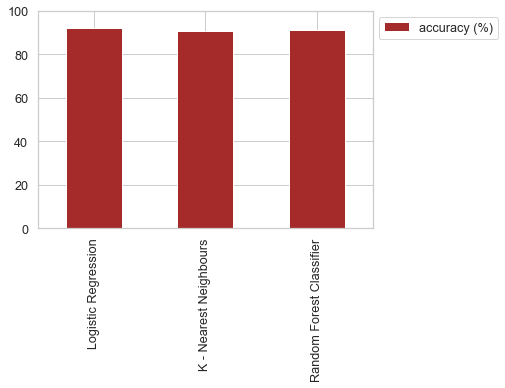

In [73]:
plt.figure(figsize=(4,2))
sns.set(style='whitegrid', font_scale=1.15)
acc.T.plot(kind='bar', color='brown', ylim=[0,100])
plt.legend(loc='upper left', bbox_to_anchor=(1,1));

### 5.6. Hyperparamter Tuning

### 5.6.1 K-Nearest Neighbours:

 The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. This largely depends on the number of neighbours or K-neighbors of the new data point.
 
 For the purpose of determining the best k-value(s) we will use something called as the **Elbow Method**.
 
 With elbow method we will determine the error rate which will help us find the best k-values
 
 We can refer to https://en.wikipedia.org/wiki/Elbow_method_(clustering) for further understanding.

In [74]:
error_rate = []

for i in range(1,41):
    
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train, y_train)
    knn_preds = knn1.predict(X_test)
    error_rate.append(np.mean(knn_preds != y_test))

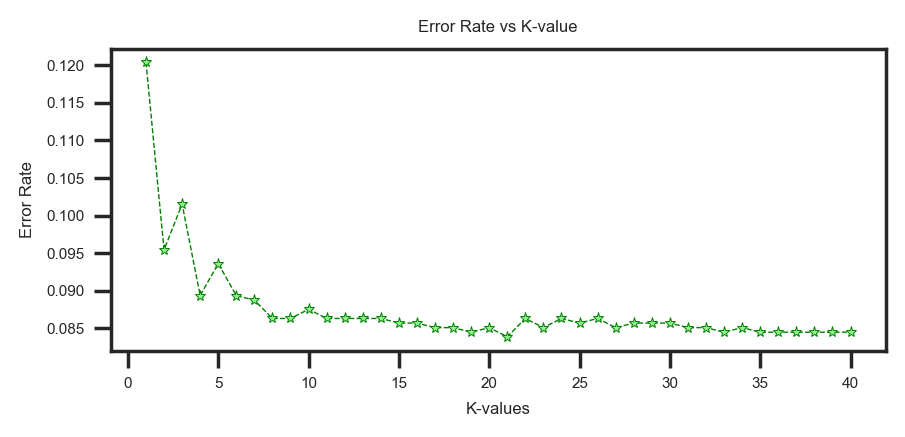

In [75]:
plt.figure(figsize=(5,2), dpi=200)
sns.set(style='ticks', font_scale=0.5)

plt.plot(range(1,41), error_rate, linestyle='--', color='green', linewidth=0.5, 
         marker='*', markersize=4, mew=0.35,
         markerfacecolor='lightgreen')
plt.title('Error Rate vs K-value')
plt.xlabel('K-values')
plt.ylabel('Error Rate');

**Building model with k=22 neighbours**

In [100]:
knn_t = KNeighborsClassifier(n_neighbors=22)
knn_t.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

In [112]:
er_knn = knn_t.score(X_test, y_test)
er_knn

0.9136778115501519

### 5.6.2 Random Forest Classifier

We will use the same elbow method to determine the optimum numbers of estimators for our Random Forest Classifier model.

In [106]:
error_rate_rfc = []

for i in range(100,1000,100):
    
    rfc1 = RandomForestClassifier(n_estimators=i)
    rfc1.fit(X_train, y_train)
    rfc_preds = rfc1.predict(X_test)
    error_rate_rfc.append(np.mean(rfc_preds != y_test))

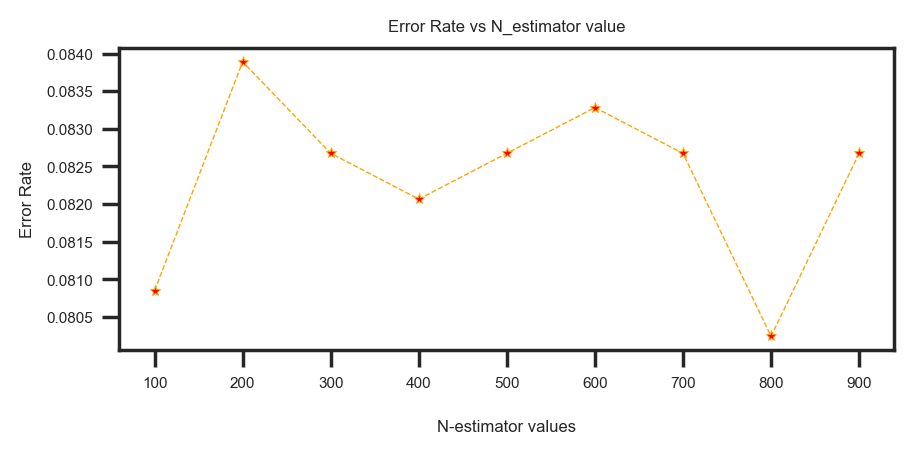

In [107]:
plt.figure(figsize=(5,2), dpi=200)
sns.set(style='ticks', font_scale=0.5)

plt.plot(range(100,1000,100), error_rate_rfc, linestyle='--', color='orange', linewidth=0.5, 
         marker='*', markersize=4, mew=0.35,
         markerfacecolor='red')
plt.title('Error Rate vs N_estimator value')
plt.xlabel('\nN-estimator values')
plt.ylabel('Error Rate');

**Building the Random Forest Classifier model with 800 estimators**

In [108]:
rfc_t = RandomForestClassifier(n_estimators=800)
rfc_t.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
er_rfc = rfc_t.score(X_test, y_test)
er_rfc

0.9148936170212766

In [117]:
er_model_score = {'K-Nearest Neighbors':er_knn*100, 'Random Forest Classifier':er_rfc*100}
er_acc = round(pd.DataFrame(er_model_score, index=['acc (%)']), 2)
er_acc

,K-Nearest Neighbors,Random Forest Classifier
acc (%),91.37,91.49


In [118]:
acc

,Logistic Regression,K - Nearest Neighbours,Random Forest Classifier
accuracy (%),92.1,90.64,91.31


### 5.6.3. Tuning Logistic Regression and Random Forest Classifier with Random Search CV

**Creating Hyperparamter grids for Logistic Regression and Random Forest Classifier**

In [121]:
# Creat a hyperparameter grid for Logistic Regression
log_reg_grid = {'C': np.logspace(-4,4,20),
               'solver': ['liblinear']}

# Creat a hyperparameters grid for RandomForestlassifier

rf_grid = {'n_estimators': np.arange(10,1000,50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1,20,2)}

**Logistic Regression**

In [122]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)

# Setup randomized hyperparamter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit randomized hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributi...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [123]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 29.763514416313132}

In [124]:
log_reg_rs_score = rs_log_reg.score(X_test, y_test)
log_reg_rs_score

0.9264437689969605

**Tuning Random Forest Classifier**

In [125]:
from sklearn.model_selection import RandomizedSearchCV

# Setup RandomSeed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit randomized hyperparamter search for RandomForestClassifier
rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.5min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [127]:
# Find the best hyperparameters
rs_rfc.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [130]:
# Evaluate the randomized search RandomForestClassifier
rfc_rs_score = rs_rfc.score(X_test, y_test)
rfc_rs_score

0.9191489361702128

In [131]:
rs_model_score = {'Logistic Regression':log_reg_rs_score*100, 'Random Forest Classifier':rfc_rs_score*100}
rs_acc = round(pd.DataFrame(rs_model_score, index=['acc (%)']), 2)
rs_acc

,Logistic Regression,Random Forest Classifier
acc (%),92.64,91.91


**Baseline model score**

In [133]:
acc.drop('K - Nearest Neighbours', axis=1)

,Logistic Regression,Random Forest Classifier
accuracy (%),92.1,91.31
